## This is a simple data analysis project on a collection of US presidential speeches. I graph the length of average sentence per speech, length of speeches over time, find the most similar speeches, etc. 
Note, there might be some redundancy because this was initially two separate projects that I joined together. 

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
import math
import copy
import pandas as pd

## How long are the speeches? 

In [2]:
#replaces a character in text based on index
#s = string, p = index to be replaced at, r=what to replace with
def change_char(s, p, r):
    return s[:p]+r+s[p+1:]
#returns the intercept and slope of linear function
#X = data (including a columns of 1's for intercept)
def get_line_reg(X, y):
    XtXinv = np.linalg.inv(np.dot(np.matrix.transpose(X), X))
    t = np.dot(XtXinv, np.matrix.transpose(X))
    b = np.dot(t, y)
    return b

In [4]:
with open('speeches.json', 'r') as f:
    speeches = json.loads(f.read())

For parsing the text into sentences I first go over it and try to repalce any '.'-s that aren't end of sentence with ','-s. Afterwards I simply split at '.'
I figured out the cases where '.' doesn't mean end of sentence by splitting and printing out the suspiciously short sentences. Some errors definitely still exist (not sure if I ever don't split a sentence that needs to be split, some cases I split into false sentences) but there aren't many such cases. Sometimes it splits whitespace into a sentence and I ignore those at the end. Some splits are also due to typos in the text. 

In [5]:
%%time
ls = []
for j in range(len(speeches)):
    subls = []
    text = speeches[j]['text']
    for i in range(len(text)-1): #This takes care of numbers. i.e. 5.4M 
        if text[i]>='0' and text[i]<='9' and text[i+1]=='.':
            text = change_char(text, i+1, ',')
    for i in range(len(text)-1): #This takes care of cases such as .... 
        if text[i]=='.':
            k=i+1
            while text[k]=='.':
                text = change_char(text, k, ',')
                k+=1
    for i in range(len(text)-5):
        if text[i:i+3]=='Mr.' or text[i:i+3]=='Dr.' or text[i:i+3]=='St.' or  text[i:i+4]=='Va.':
            text = change_char(text, i+2, ',')
        if text[i:i+4]=='i.e.':
            text = change_char(text, i+1, ',')
            text = change_char(text, i+3, ',')
        if text[i:i+4]=='Gen.' or text[i:i+4]=='Col.':
            text = change_char(text, i+3, ',')
        if text[i:i+5]=='etc.,':
            text = change_char(text, i+3, ',')
        if text[i]>='A' and text[i]<='Z' and text[i+1]=='.': #Takes care of abbreviations, the top ones are self-explanatory 
            text = change_char(text, i+1, ',')
    split = text.split('.')
    
    for i in range(len(split)):
        if not(split[i].isspace()): #ignoring all whitespace sentences
            subls.append(split[i])
    ls.append(subls)
    #ls now has a list of speeches each of which is a list of sentences.    
    

Wall time: 34.4 s


In [6]:
n_sentences = [len(x) for x in ls] #list of number of sentences per speech
years = [float(x['year']) for x in speeches] #list of year number per speech (I think 1 or two years are repeated)
n_words = [] #I split words by whitespace. n_words has a list of average sentence length per speech
temp = []
for i in range(len(ls)):
    for j in range(len(ls[i])):
        temp.append(len(ls[i][j].split(' ')))
    n_words.append(sum(temp)/len(temp))
X = np.column_stack(([1 for x in years], years)).astype('float') 
#X = is the dataset where the first column is years, the second is all 1's. It's easier to get the linear regression this way
    

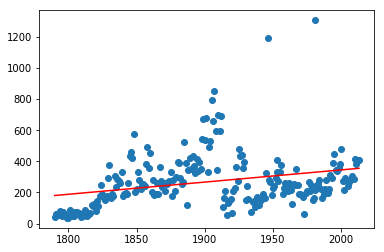

slope:  0.7842893892456606  intercept:  -1223.7718577784333


In [7]:
#Sentence length per speech vs year
plt.scatter(years, n_sentences)
b = get_line_reg(X, n_sentences) #b[1] = slope, b[0]=intercept
x_r = np.linspace(1790,2013,10)
plt.plot(years, [year*b[1]+b[0] for year in years], c='red')
plt.show()
print("slope: ", b[1], " intercept: ", b[0])

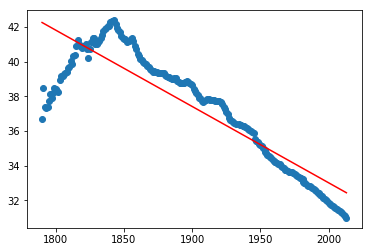

slope:  -0.0439706575994672  intercept:  120.9604365814178


In [8]:
#Average sentence length per year
plt.scatter(years, n_words)
b = get_line_reg(X, n_words)
x_r = np.linspace(1790,2013,10)
plt.plot(years, [year*b[1]+b[0] for year in years], c='red')
plt.show()
print("slope: ", b[1], " intercept: ", b[0])

slope:  3.9856270653028427  intercept:  -7112.332059795292
slope:  1.1553958248484126  intercept:  -1999.6338085003154


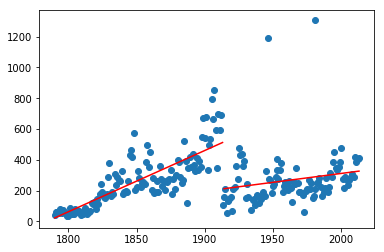

In [9]:
#these are the two separate regressions for number of sentences 
plt.scatter(years, n_sentences)
b = get_line_reg(X[0:124], n_sentences[0:124]) 
print("slope: ", b[1], " intercept: ", b[0])
x_r = np.linspace(1790,2013,10)
plt.plot(years[0:124], [year*b[1]+b[0] for year in years[0:124]], c='red')
b = get_line_reg(X[124:], n_sentences[124:]) 
plt.plot(years[124:], [year*b[1]+b[0] for year in years[124:]], c='red')
print("slope: ", b[1], " intercept: ", b[0])
plt.show()

slope:  -0.009978224166518848  intercept:  58.260046368271944
slope:  -0.06938655631848639  intercept:  170.58564313531366


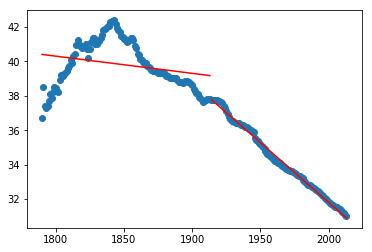

In [10]:
#And the two separate regressions for sentence length
plt.scatter(years, n_words)
b = get_line_reg(X[0:124], n_words[0:124]) 
print("slope: ", b[1], " intercept: ", b[0])
x_r = np.linspace(1790,2013,10)
plt.plot(years[0:124], [year*b[1]+b[0] for year in years[0:124]], c='red')
b = get_line_reg(X[124:], n_words[124:]) 
plt.plot(years[124:], [year*b[1]+b[0] for year in years[124:]], c='red')
print("slope: ", b[1], " intercept: ", b[0])
plt.show()

After 1913, the speeches were delivered in person. As a result they got shorter in general and the sentences stopped being so complicated. 

In [11]:
#this is just some formatting to make things easier. 
#I made a dataframe with president name and average sentence length for a given year
df = pd.DataFrame(columns=['pres', 'len'], data = np.column_stack(([x['president'] for x in speeches], n_words)))
df.head()

,pres,len
0,George Washington,36.69230769230769
1,George Washington,38.5
2,George Washington,37.379746835443036
3,George Washington,37.306603773584904
4,George Washington,37.391752577319586


In [12]:
#df average processes the dataset above to take average over the years for each president
presidents = list(set([x['president'] for x in speeches]))
df_avg = pd.DataFrame(columns=['pres', 'avg_len'])

for pres in presidents:
    df_avg.loc[-1] = [pres, df[df['pres']==pres]['len'].astype('float').mean()]
    df_avg.index+=1

In [13]:
#shortest, longest, 25%, 75%
df_avg = df_avg.sort_values('avg_len')
print("SHORTEST SENTENCES: ", df_avg.iloc[0])
print("LONGEST SENTENCES: ", df_avg.iloc[len(df_avg)-1])
print("25% SENTENCES: ", df_avg.iloc[int(len(df_avg)*0.25)])
print("75% SENTENCES: ", df_avg.iloc[int(len(df_avg)*0.75)])


SHORTEST SENTENCES:  pres       Barack Obama
avg_len          31.185
Name: 35, dtype: object
LONGEST SENTENCES:  pres       John Tyler
avg_len        42.298
Name: 27, dtype: object
25% SENTENCES:  pres       Dwight D. Eisenhower
avg_len                 34.4954
Name: 5, dtype: object
75% SENTENCES:  pres       James Madison
avg_len          40.2715
Name: 19, dtype: object


In [14]:
#longest sentence: 
#I set the boundary to less than 330 words to filter out uninteresting bookkeeping-like sentences 
max_n = 0
max_s = ''
for i in range(len(ls)):
    for j in range(len(ls[i])):
        new_len = len(ls[i][j].split(' '))
        if new_len>max_n and new_len<=330:
            max_n = new_len
            max_s = ls[i][j]

In [15]:
print(max_s)

 We have to maintain inviolate the great doctrine of the inherent right of popular self-government; to reconcile the largest liberty of the individual citizen with complete security of the public order; to render cheerful obedience to the laws of the land, to unite in enforcing their execution, and to frown indignantly on all combinations to resist them; to harmonize a sincere and ardent devotion to the institutions of religions faith with the most universal religious toleration; to preserve the rights of all by causing each to respect those of the other; to carry forward every social improvement to the uttermost limit of human perfectibility, by the free action of mind upon mind, not by the obtrusive intervention of misapplied force; to uphold the integrity and guard the limitations of our organic law; to preserve sacred from all touch of usurpation, as the very palladium of our political salvation, the reserved rights and powers of the several States and of the people; to cherish wit

## Similarities between the speeches

In [16]:
def clean_and_split(s):
    #encode to UTF-8, convert to lowercase and translate all hyphens and
    # punctuation to whitespace
    s = s.lower().replace('-',' ')
    translator = str.maketrans('', '', string.punctuation)
    
    s = s.translate(translator)
    # replace \r\n
    s = s.replace('\n', ' ')
    s = s.replace('\r', ' ')
    # replace whitespace substrings with one whitespace and remove
    # leading/trailing whitespaces
    s = re.sub(' +', ' ', s.strip())
    return s.split(' ')

In [17]:
def get_V(speeches):
    all_words = []
    for i in range(len(speeches)):
        all_words+=list(clean_and_split(speeches[i]['text']))
    df = pd.DataFrame(data=all_words)
    top30_words = df[0].value_counts().keys()[0:30]
    df = df[~df[0].isin(top30_words)]
    lessthan60_words = df[0].value_counts()[df[0].value_counts()<=60].keys()
    df = df[~df[0].isin(lessthan60_words)]
    df = df.reset_index().drop('index', axis=1)
    return list(df[0].unique())

In [18]:
def get_words_per_doc(speeches):
    longest_speech = max([len(clean_and_split(speeches[x]['text'])) for x in range(len(speeches))])
    words_per_doc = pd.DataFrame(columns=list(range(len(speeches))))
    words_per_doc[300] = np.zeros(longest_speech+1)
    for i in range(len(speeches)):
        words_per_doc[i]=pd.Series(clean_and_split(speeches[i]['text']))
    words_per_doc = words_per_doc.drop([300], axis=1)
    return words_per_doc

In [19]:
def get_doccount_per_word(V_df, words_per_doc):
    D = words_per_doc.shape[1]
    d = []
    
    for word in V_df[0]:
        print(len(d))
        d.append(sum([word in list(words_per_doc[x].unique()) for x in range(D)]))
        clear_output()
    return d

In [20]:
def get_tf_idf(ind, d_i, V_df, words_per_doc): #d_ind = index of the speech we're vectorizing
    D = words_per_doc.shape[1]
    w_i = []
    for i in range(len(V_df)):
        n_i = 0
        if V_df[0][i] in list(words_per_doc[ind]):
            n_i = words_per_doc[ind].value_counts()[V_df[0][i]]
        w_i.append(n_i * math.log(D/d_i[i]))
    return w_i
        

In [ ]:
%%time
V_df = pd.DataFrame(data=get_V(speeches))
words_per_doc = get_words_per_doc(speeches)
d_i = get_doccount_per_word(V_df, words_per_doc)
tf_idf = []
for i in range(len(words_per_doc.columns)):
    print(i)
    tf_idf.append(get_tf_idf(i, d_i, V_df, words_per_doc))
    clear_output()
tf_idf_df = pd.DataFrame(data=np.asarray(tf_idf))
#......................................................................................
#saving here because it took forever to compute
tf_idf_df.to_csv('tf_idf_df.csv')
#......................................................................................

In [26]:
tf_idf_df = pd.read_csv('tf_idf_df.csv')
tf_idf = tf_idf_df.values

In [27]:
def get_sim(tf_idf, i, j):
    wi = tf_idf[i]
    wj = tf_idf[j]
    return np.dot(wi, wj)/(math.sqrt(np.dot(wi,wi)) * math.sqrt(np.dot(wj, wj)))

In [30]:
sim = np.zeros((226,226))
for i in range(226):
    for j in range(226):
        if j<=i:
            continue
        sim[i][j] = get_sim(tf_idf, i, j)

In [31]:
def get_50_sims(sim):
    i = []
    j = []
    sim2 = copy.deepcopy(sim)
    for k in range(50):
        ind1d = sim2.argmax()
        j_ind = int(ind1d%226)
        i_ind = int((ind1d-j_ind)/226)
        i.append(i_ind)
        j.append(j_ind)
        sim2[i_ind][j_ind] = 0
    return i, j

In [32]:
def get_50_sims_samepres(sim):
    presidents = [x['president'] for x in speeches]
    sim2 = copy.deepcopy(sim)
    for i in range(226):
        for j in range(226):
            if presidents[i]!=presidents[j]:
                sim2[i][j] = 0
    i = []
    j = []
    for k in range(50):
        ind1d = sim2.argmax()
        j_ind = int(ind1d%226)
        i_ind = int((ind1d-j_ind)/226)
        i.append(i_ind)
        j.append(j_ind)
        sim2[i_ind][j_ind] = 0
    return i, j

the indices of the most similar speeches is in sim50_df. 

In [37]:
sim50i, sim50j = get_50_sims(sim)
sim50_df = pd.DataFrame(columns=['speech_index_1', 'speech_index_2'])
sim50_df['speech_index_1'] = sim50i
sim50_df['speech_index_2'] = sim50j

sim50_df

,speech_index_1,speech_index_2
0,183,184
1,143,184
2,197,198
3,149,184
4,150,184
5,175,184
6,198,199
7,198,203
8,189,190
9,149,150


In [39]:
#Most similar speeches below 
print(speeches[222]['text'])
print(speeches[224]['text'])


Madam Speaker, Vice President Biden, Members of Congress, distinguished guests, and fellow Americans: Our Constitution declares that from time to time, the President shall give to Congress information about the state of our Union. For 220 years, our leaders have fulfilled this duty. They've done so during periods of prosperity and tranquility, and they've done so in the midst of war and depression, at moments of great strife and great struggle. 

It's tempting to look back on these moments and assume that our progress was inevitable, that America was always destined to succeed. But when the Union was turned back at Bull Run and the Allies first landed at Omaha Beach, victory was very much in doubt. When the market crashed on Black Tuesday and civil rights marchers were beaten on Bloody Sunday, the future was anything but certain. These were the times that tested the courage of our convictions and the strength of our Union. And despite all our divisions and disagreements, our hesitation

In [40]:
sim50i_samepres, sim50j_samepres = get_50_sims_samepres(sim)
sim50_df_samepres = pd.DataFrame(columns=['speech_index_1', 'speech_index_2'])
sim50_df_samepres['speech_index_1'] = sim50i_samepres
sim50_df_samepres['speech_index_2'] = sim50j_samepres

sim50_df_samepres

,speech_index_1,speech_index_2
0,183,184
1,197,198
2,198,199
3,189,190
4,149,150
5,219,220
6,143,149
7,196,197
8,181,184
9,197,199


In [41]:
#Most similar speeches by the same president below
print(speeches[183]['text'])
print(speeches[184]['text'])


Mr. Speaker, Mr. President, my colleagues in the Congress, our distinguished guests, my fellow Americans: 

Twenty-five years ago I sat here as a freshman Congressman--along with Speaker Albert--and listened for the first time to the President address the State of the Union. 

I shall never forget that moment. The Senate, the diplomatic corps, the Supreme Court, the Cabinet entered the Chamber, and then the President of the United States. As all of you are aware, I had some differences with President Truman. He had some with me. But I remember that on that day--the day he addressed that joint session of the newly elected Republican 80th Congress, he spoke not as a partisan, but as President of all the people-calling upon the Congress to put aside partisan considerations in the national interest. 

The Greek-Turkish aid program, the Marshall Plan, the great foreign policy initiatives which have been responsible for avoiding a world war for over 25 years were approved by the 80th Congres